In [8]:
import tensorflow.keras as keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

import time
from statistics import mean, pstdev


In [9]:
def load_fashion_mnist():
    '''Loads the fashion MNIST dataset from keras.'''
    (X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
    y_train_onehot = keras.utils.to_categorical(y_train)
    y_test_onehot = keras.utils.to_categorical(y_test)
    return X_train, y_train_onehot, X_test, y_test_onehot


class Model:

    def __init__(self):
        self.model = Sequential()

    def build(self):
        '''Builds the sequential model by adding layers.'''
        # 2D Convolutional layer for images
        self.model.add(Conv2D(32, 3, activation='relu', kernel_initializer=GlorotNormal(), input_shape=(28, 28, 1)))
        # Max pooling for 2D spatial data, downsamples the input
        self.model.add(MaxPooling2D((2, 2)))
        # Randomly sets input units to 0 to prevent overfitting
        self.model.add(Dropout(0.25))
        # 2D Convolutional layer for images
        self.model.add(Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
        # Flattens the input before dense layers
        self.model.add(Flatten())
        # Standard densely-connected neural network layers
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(10, activation='softmax'))
        # Output layer with SGD gradoemt descent optimizer and categorical crossentropy loss function
        self.model.compile(optimizer=SGD(momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

    def validate(self, X, Y, K):
        '''Validates the model accuracy using k-fold cross-validation.'''
        train_accs = []
        test_accs = []
        kfold = KFold(K, shuffle=True, random_state=1)
        k_count = 1
        for i_train, i_test in kfold.split(X):
            X_train, y_train, X_test, y_test = X[i_train], Y[i_train], X[i_test], Y[i_test]
            self.model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

            _, train_acc = self.model.evaluate(X_train, y_train)
            train_accs.append(train_acc)

            _, test_acc = self.model.evaluate(X_test, y_test)
            test_accs.append(test_acc)

            k_count += 1

        return train_accs, test_accs


start = time.time()
X_train, y_train, X_test, y_test = load_fashion_mnist()
model = Model()
model.build()

train_accs, test_accs = model.validate(X_train, y_train, K=7)

for i, train_acc in enumerate(train_accs):
    print(f'k={i + 1}: Train Accuracy: {round(train_acc * 100, 2)}%')
print(f'Mean Train Accuracy: {round(mean(train_accs) * 100, 2)}% +/- {round(pstdev(train_accs) * 100, 2)}%')

for i, test_acc in enumerate(test_accs):
    print(f'k={i + 1}: Test Accuracy: {round(test_acc * 100, 2)}%')
print(f'Mean Test Accuracy: {round(mean(test_accs) * 100, 2)}% +/- {round(pstdev(test_accs) * 100, 2)}%')

runtime = round(int(time.time() - start) / 60, 2)
print(f'--- {runtime}m ---')


Epoch 1/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.5824 - accuracy: 0.7816 - val_loss: 0.3937 - val_accuracy: 0.8563
Epoch 2/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.3499 - accuracy: 0.8713 - val_loss: 0.3201 - val_accuracy: 0.8840
Epoch 3/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.2957 - accuracy: 0.8908 - val_loss: 0.3085 - val_accuracy: 0.8864
Epoch 4/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.2660 - accuracy: 0.9006 - val_loss: 0.2671 - val_accuracy: 0.8993
Epoch 5/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.2425 - accuracy: 0.9096 - val_loss: 0.2448 - val_accuracy: 0.9095
Epoch 6/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.2259 - accuracy: 0.9152 - val_loss: 0.2570 - val_accuracy: 0.9055
Epoch 7/12
1608/1608 [==============================] - 11s 7ms/step - loss: 0.2096 - accuracy: 0.9214 - val_loss: 0.2446 - val_ac

In [12]:
for i, train_acc in enumerate(train_accs):
    print(f'k={i + 1}: Train Accuracy: {round(train_acc * 100, 2)}%')
print(f'Mean Train Accuracy: {round(mean(train_accs) * 100, 2)}% +/- {round(pstdev(train_accs) * 100, 2)}%')

for i, test_acc in enumerate(test_accs):
    print(f'k={i + 1}: Test Accuracy: {round(test_acc * 100, 2)}%')
print(f'Mean Test Accuracy: {round(mean(test_accs) * 100, 2)}% +/- {round(pstdev(test_accs) * 100, 2)}%')


k=1: Train Accuracy: 96.01%
k=2: Train Accuracy: 98.24%
k=3: Train Accuracy: 99.22%
k=4: Train Accuracy: 99.38%
k=5: Train Accuracy: 99.53%
k=6: Train Accuracy: 99.84%
k=7: Train Accuracy: 99.86%
Mean Train Accuracy: 98.87% +/- 1.27%
k=1: Test Accuracy: 91.24%
k=2: Test Accuracy: 93.88%
k=3: Test Accuracy: 96.3%
k=4: Test Accuracy: 97.33%
k=5: Test Accuracy: 98.24%
k=6: Test Accuracy: 99.23%
k=7: Test Accuracy: 99.42%
Mean Test Accuracy: 96.52% +/- 2.78%


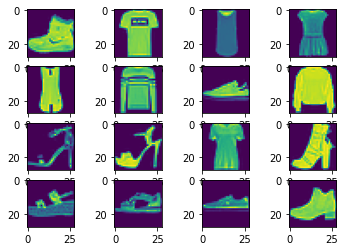

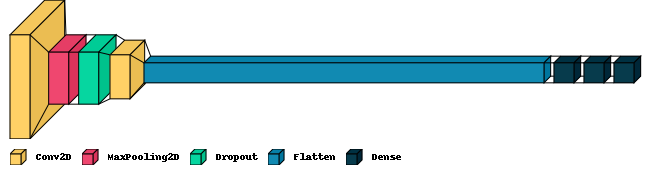

In [13]:
import matplotlib.pyplot as plt
import visualkeras


# Visualize dataset
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i])
plt.show()

# Visualize the model layers
visualkeras.layered_view(model.model, legend=True)
